# LendingClub Data Part I: Introduction

blog posts url:
http://blog.supersingularity.co/introducing-the-lendingclub-loan-data/
http://blog.supersingularity.co/bench-marking-the-lendingclub-data/

We introduce the LendingClub dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline(connected=True)

In [2]:
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode

In [3]:
init_notebook_mode(connected=True)

In [4]:
loan_data = pd.read_csv('loan_data.csv')

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Visualization

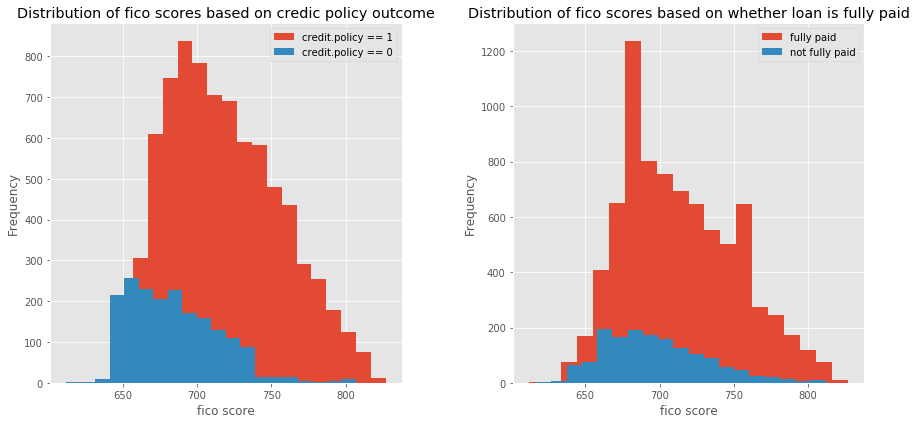

In [8]:
plt.style.use('ggplot')
fig1,(ax1,ax2)=plt.subplots(figsize=(13,6),ncols=2)
ax1.set_title('Distribution of fico scores based on credic policy outcome')
ax1.set_xlabel('fico score')
loan_data[loan_data['credit.policy'] == 1].plot(y='fico',kind='hist',grid=True,ax=ax1,label='credit.policy == 1',bins=20)
loan_data[loan_data['credit.policy'] == 0].plot(y='fico',kind='hist',grid=True,ax=ax1,label='credit.policy == 0',bins=20)
ax2.set_title('Distribution of fico scores based on whether loan is fully paid')
ax2.set_xlabel('fico score')
loan_data[loan_data['not.fully.paid'] == 0].plot(y='fico',kind='hist',grid=True,ax=ax2,label='fully paid',bins=20)
loan_data[loan_data['not.fully.paid'] == 1].plot(y='fico',kind='hist',grid=True,ax=ax2,label='not fully paid',bins=20)
fig1.tight_layout()

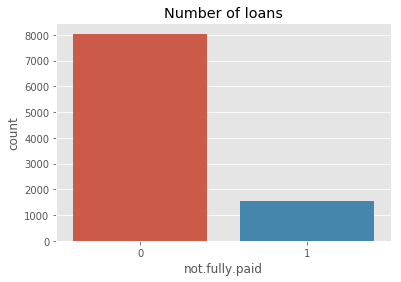

In [9]:
fig_pay,ax_pay=plt.subplots()
ax_pay.set_title('Number of loans')
sns.countplot(x='not.fully.paid',data=loan_data,ax=ax_pay)

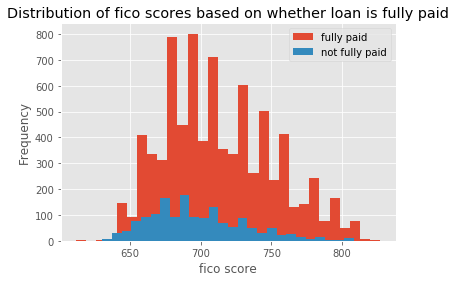

In [10]:
fig2,ax2=plt.subplots()
ax2.set_title('Distribution of fico scores based on whether loan is fully paid')
ax2.set_xlabel('fico score')
loan_data[loan_data['not.fully.paid'] == 0].plot(y='fico',kind='hist',grid=True,ax=ax2,label='fully paid',bins=30)
loan_data[loan_data['not.fully.paid'] == 1].plot(y='fico',kind='hist',grid=True,ax=ax2,label='not fully paid',bins=30)

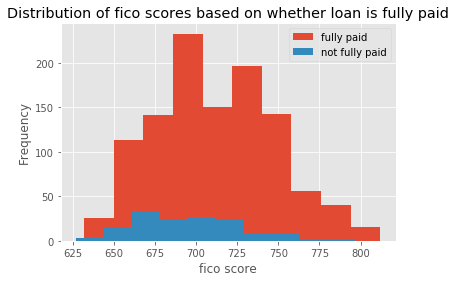

In [11]:
fig3,ax_debt=plt.subplots()
ax_debt.set_title('Distribution of fico scores based on whether loan is fully paid')
ax_debt.set_xlabel('fico score')
debt_cons = loan_data[loan_data['purpose'] == 'credit_card']
debt_cons[debt_cons['not.fully.paid'] == 0].plot(y='fico',kind='hist',grid=True,ax=ax_debt,label='fully paid',bins=10)
debt_cons[debt_cons['not.fully.paid'] == 1].plot(y='fico',kind='hist',grid=True,ax=ax_debt,label='not fully paid',bins=10)

Text(0.5,1,'Purposes of the loan')

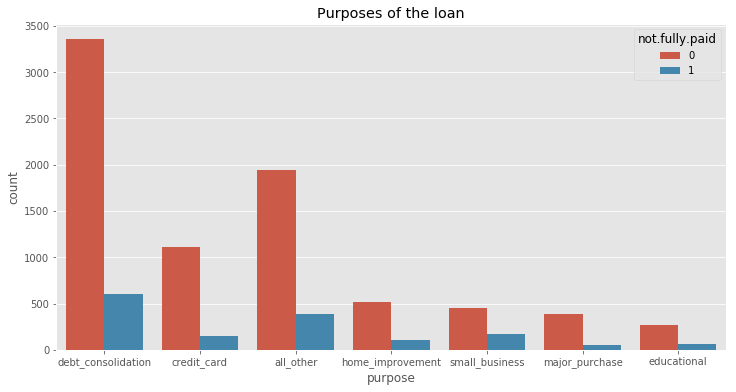

In [12]:
fig4,ax4=plt.subplots(figsize=(12,6))
sns.countplot(x='purpose',data=loan_data,hue='not.fully.paid',ax=ax4)
ax4.set_title('Purposes of the loan')

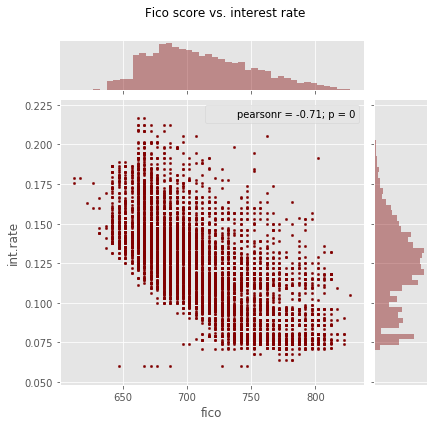

In [13]:
plt.style.use('ggplot')
sns.jointplot(x='fico',y='int.rate',data=loan_data,kind='scatter',s=5,color='maroon')
plt.suptitle('Fico score vs. interest rate')
plt.subplots_adjust(top=0.9)

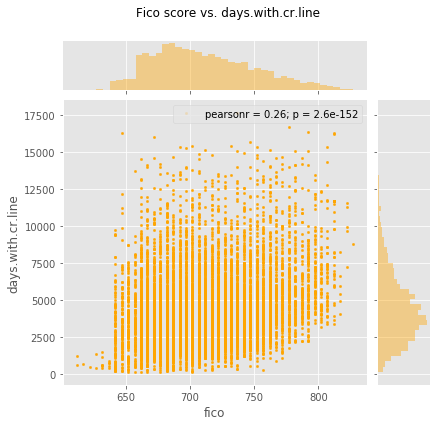

In [14]:
sns.jointplot(x='fico',y='days.with.cr.line',data=loan_data,kind='scatter',s=5,color='orange')
plt.suptitle('Fico score vs. days.with.cr.line')
plt.subplots_adjust(top=0.9)

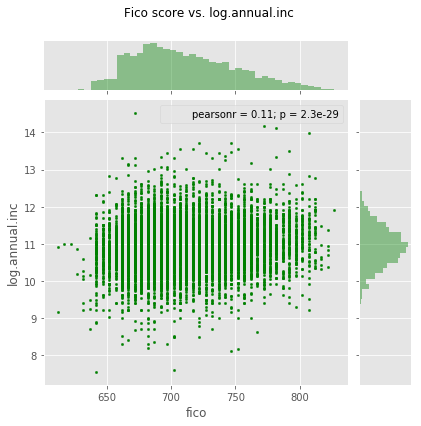

In [15]:
j1 = sns.jointplot(x='fico',y='log.annual.inc',data=loan_data,kind='scatter',s=5,color='green')
plt.suptitle('Fico score vs. log.annual.inc')
plt.subplots_adjust(top=0.9)

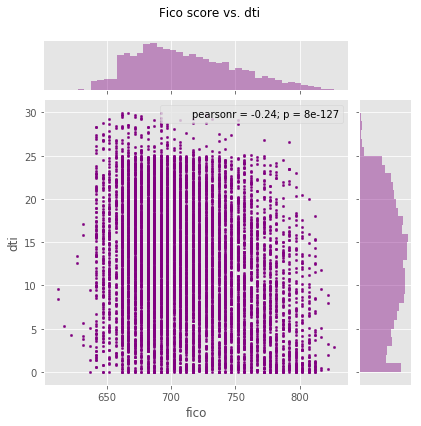

In [16]:
sns.jointplot(x='fico',y='dti',data=loan_data,kind='scatter',s=5,color='purple')
plt.suptitle('Fico score vs. dti')
plt.subplots_adjust(top=0.9)

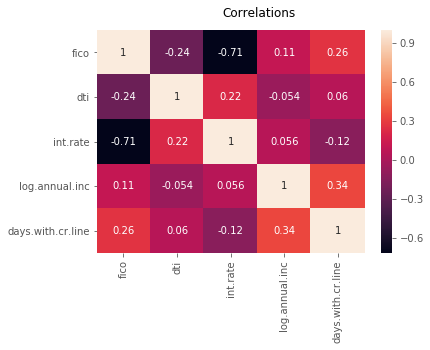

In [17]:
fico_corr = loan_data[['fico','dti','int.rate','log.annual.inc','days.with.cr.line']].corr()
sns.heatmap(fico_corr,annot=True)
plt.suptitle('Correlations')
plt.subplots_adjust(top=0.9)

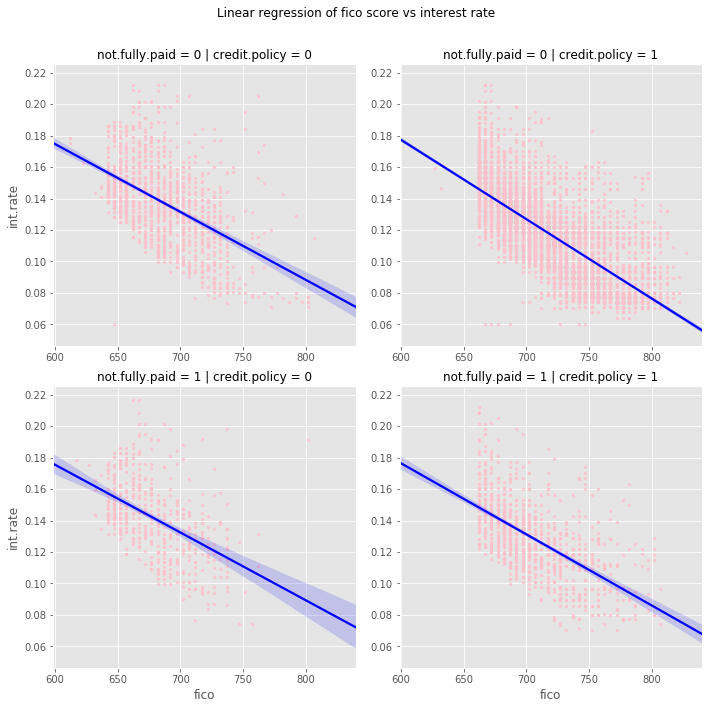

In [18]:
sns.lmplot(x='fico',y='int.rate',data=loan_data,col='credit.policy',row='not.fully.paid',scatter_kws={'s':5,'color':'pink'}\
          ,line_kws={'color':'blue'})
plt.suptitle('Linear regression of fico score vs interest rate')
plt.subplots_adjust(top=.9)


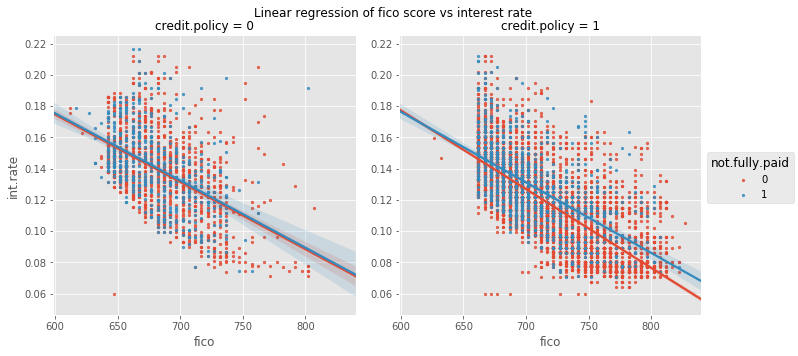

In [19]:
sns.lmplot(x='fico',y='int.rate',data=loan_data,col='credit.policy',hue='not.fully.paid',scatter_kws={'s':5}\
          ,line_kws={})
plt.suptitle('Linear regression of fico score vs interest rate')
plt.subplots_adjust(top=.9)
